## Final Project Submission

Please fill out:
* Student name: Shimnaz
* Student pace: part time 
* Scheduled project review date/time: 15/10/23
* Instructor name: Hardik Idnani
* Blog post URL:


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
df1.rename(columns={'title': 'primary_title'}, inplace=True)
df1=df1.drop(['year'],axis=1)
df1.head()

,primary_title,studio,domestic_gross,foreign_gross
0,Toy Story 3,BV,415000000.0,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
3,Inception,WB,292600000.0,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000


In [5]:
df2=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
#df2=df2.drop('numvotes',axis=1)
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
df3=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
#df3=df3.drop(['original_title','start_year','runtime_minutes','genres'], axis=1)
df3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
df4=pd.merge(df2,df3)
df4.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [171]:
rv_analysis=df4.drop(['tconst','averagerating','primary_title','original_title','start_year','genres'], axis=1)
rv_analysis.dropna(inplace=True)
rv_analysis.sort_values(by='runtime_minutes',ignore_index=True,inplace=True)
rv_analysis=rv_analysis.reindex(columns=["runtime_minutes","numvotes"])
rv_analysis
#rv_analysis.to_csv(index=False)

,runtime_minutes,numvotes
0,3.0,5
1,3.0,10
2,3.0,8
3,4.0,6
4,4.0,5
...,...,...
66231,808.0,100
66232,1100.0,5
66233,1440.0,219
66234,14400.0,69


In [251]:
last=rv_analysis["runtime_minutes"].iloc[-1]
a=np.arange(0,(((last/10)+1)*10),10)
b=a[1:-1]
rv_analysis["bins"]=pd.cut(rv_analysis["runtime_minutes"],a,labels=np.arange(10,(((last/10)+1)*10),10))
rv=rv_analysis.groupby('bins',as_index=False)['numvotes'].mean().sort_values(by='bins',ignore_index=True)
rv["numvotes"]=rv["numvotes"].fillna(0)
rv["cumilative"]=rv["numvotes"]
rv

,bins,numvotes,cumilative
0,10.0,11.375000,11.375000
1,20.0,17.135135,17.135135
2,30.0,18.557522,18.557522
3,40.0,52.086957,52.086957
4,50.0,75.593724,75.593724
...,...,...,...
5137,51380.0,0.000000,0.000000
5138,51390.0,0.000000,0.000000
5139,51400.0,0.000000,0.000000
5140,51410.0,0.000000,0.000000


In [271]:
for i in rv.index:
    if i==0:
        rv.at[i,"cumilative"]=rv.loc[i,"numvotes"]
    else:
        rv.at[i,"cumilative"]=rv.loc[i-1,"cumilative"]+rv.loc[i,"numvotes"]

In [277]:
sum=rv["cumilative"].iloc[-1]
P25=0.25*sum
P50=0.5*sum
P75=0.75*sum
iP25=0
iP50=0
iP75=0
for i in rv.index:
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P25 and rv.at[i,"cumilative"]>P25:
        iP25=i-1
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P50 and rv.at[i,"cumilative"]>P50:
        iP50=i-1 
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P75 and rv.at[i,"cumilative"]>P75:
        iP75=i-1  

In [278]:
rv.loc[iP25,'bins']


130.0

In [279]:
rv.loc[iP50,'bins']

160.0

In [280]:
rv.loc[iP75,'bins']

190.0

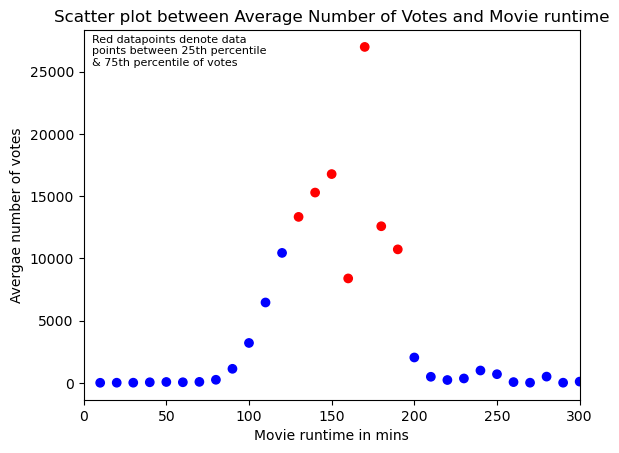

In [314]:
x=rv.loc[:,'bins']
y=rv.loc[:,'numvotes']
colors = ['red' if 130 <= value <= 190 else 'blue' for value in x]
plt.scatter(x, y, c=colors)
plt.xlim(0, 300)
plt.title("Scatter plot between Average Number of Votes and Movie runtime")
plt.xlabel("Movie runtime in mins")
plt.ylabel("Avergae number of votes")
side_text = "Red datapoints denote data\npoints between 25th percentile \n& 75th percentile of votes"
side_x = 5 # Adjust the x-coordinate
side_y = 25500  # Adjust the y-coordinate
plt.text(side_x, side_y, side_text, fontsize=8, color='black')
plt.show()

In [12]:
df5=pd.merge(df4,df1)
df5

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000
...,...,...,...,...,...,...,...,...,...,...,...
3022,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",Magn.,5200.0,NaN
3023,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",Magn.,177000.0,NaN
3024,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN
3025,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000


In [13]:
rs_analysis =df5.groupby('studio',as_index=False)['averagerating'].mean().sort_values(by='averagerating', ascending=False,ignore_index=True)
rs_analysis.iloc[0:10,:]

,studio,averagerating
0,Trafalgar,8.8
1,NAV,8.7
2,GrtIndia,8.3
3,SHO,8.2
4,BSC,8.1
5,Pala.,8.1
6,PDA,8.0
7,App.,7.9
8,Good Deed,7.8
9,MUBI,7.7


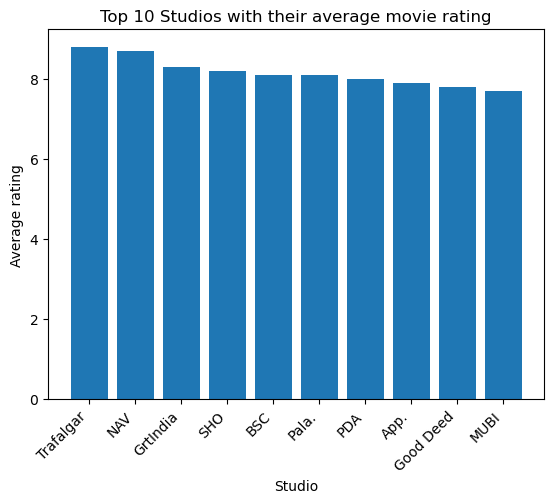

In [14]:
plt.bar(rs_analysis.iloc[0:10,0], rs_analysis.iloc[0:10,1])
plt.xlabel('Studio')
plt.ylabel('Average rating')
plt.title('Top 10 Studios with their average movie rating')
plt.xticks(rotation=45, ha="right")
plt.show()

In [15]:
df6=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df6=df6.drop(['ordering','job','characters'],axis=1)
df6.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


In [16]:
df6=df6.loc[df6['category'] == "actor"] 
df6.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
5,tt0323808,nm2694680,actor
6,tt0323808,nm0574615,actor
14,tt0417610,nm0532721,actor
16,tt0417610,nm0069209,actor


In [17]:
df7=pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df7=df7.drop(['birth_year','death_year','primary_profession','known_for_titles'],axis=1)
df7

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [18]:
df8=pd.merge(df7,df6)
df8

,nconst,primary_name,tconst,category
0,nm0062070,Bruce Baum,tt6463956,actor
1,nm0063198,Bayou,tt6579724,actor
2,nm0066093,Ahmad Bedair,tt1843163,actor
3,nm0066093,Ahmad Bedair,tt1805181,actor
4,nm0066093,Ahmad Bedair,tt2308899,actor
...,...,...,...,...
256556,nm9983906,Alejandro Odom,tt9010422,actor
256557,nm9985838,Anthony Simonetti,tt8028908,actor
256558,nm9989005,Jae-Hwan Kim,tt8733324,actor
256559,nm9989840,Mariya Shekaturova,tt5953804,actor


In [19]:
df9=pd.merge(df8,df5)
df9

,nconst,primary_name,tconst,category,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,nm0093589,Matt Bomer,tt2268016,actor,5.6,48497,Magic Mike XXL,Magic Mike XXL,2015,115.0,"Comedy,Drama,Music",WB,66000000.0,56500000
1,nm0542133,Joe Manganiello,tt2268016,actor,5.6,48497,Magic Mike XXL,Magic Mike XXL,2015,115.0,"Comedy,Drama,Music",WB,66000000.0,56500000
2,nm0735226,Adam Rodriguez,tt2268016,actor,5.6,48497,Magic Mike XXL,Magic Mike XXL,2015,115.0,"Comedy,Drama,Music",WB,66000000.0,56500000
3,nm1475594,Channing Tatum,tt2268016,actor,5.6,48497,Magic Mike XXL,Magic Mike XXL,2015,115.0,"Comedy,Drama,Music",WB,66000000.0,56500000
4,nm0093589,Matt Bomer,tt3799694,actor,7.4,240337,The Nice Guys,The Nice Guys,2016,116.0,"Action,Comedy,Crime",WB,36300000.0,26500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,nm8985330,Ghanem Zrelli,tt6776572,actor,7.0,1016,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",Osci.,8900.0,NaN
7023,nm9001397,Mohamed Akkari,tt6776572,actor,7.0,1016,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",Osci.,8900.0,NaN
7024,nm9001396,Noomen Hamda,tt6776572,actor,7.0,1016,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller",Osci.,8900.0,NaN
7025,nm7503963,Abel Abebe,tt2611390,actor,6.8,1117,Difret,Difret,2014,99.0,"Biography,Crime,Drama",TA,49700.0,NaN


In [141]:
ar_analysis=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
ar_analysis.rename(columns={'movie': 'primary_title'}, inplace=True)
ar_analysis=ar_analysis.drop(['id','release_date','production_budget','domestic_gross'],axis=1)
ar_analysis

,primary_title,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
...,...,...
5777,Red 11,$0
5778,Following,"$240,495"
5779,Return to the Land of Wonders,"$1,338"
5780,A Plague So Pleasant,$0


In [142]:
ar_analysis.describe()

,primary_title,worldwide_gross
count,5782,5782
unique,5698,5356
top,Halloween,$0
freq,3,367


In [143]:
ar_analysis_combined=pd.merge(df9,ar_analysis)
ar_analysis_combined=ar_analysis_combined.drop(['numvotes','original_title','start_year','runtime_minutes','genres','studio'],axis=1)
ar_analysis_combined.dropna(inplace=True)
ar_analysis_combined['worldwide_gross'] = ar_analysis_combined['worldwide_gross'].str.replace('\D', '', regex=True)
ar_analysis_combined

,nconst,primary_name,tconst,category,averagerating,primary_title,domestic_gross,foreign_gross,worldwide_gross
0,nm0093589,Matt Bomer,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
1,nm0542133,Joe Manganiello,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
2,nm0735226,Adam Rodriguez,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
3,nm1475594,Channing Tatum,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
4,nm0093589,Matt Bomer,tt3799694,actor,7.4,The Nice Guys,36300000.0,26500000,59596747
...,...,...,...,...,...,...,...,...,...
3447,nm8301458,Misha Nesterov,tt5897302,actor,5.9,Slender Man,30600000.0,21200000,51723644
3448,nm8301459,Leonid Zaiko,tt5897302,actor,5.9,Slender Man,30600000.0,21200000,51723644
3449,nm6018521,Colin Woodell,tt4761916,actor,5.9,Unfriended: Dark Web,8900000.0,6300000,16434588
3451,nm6907855,Noah Schnapp,tt2452042,actor,7.1,The Peanuts Movie,130199999.0,116100000,250091610


In [144]:
ar_analysis_combined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 3452
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nconst           3002 non-null   object 
 1   primary_name     3002 non-null   object 
 2   tconst           3002 non-null   object 
 3   category         3002 non-null   object 
 4   averagerating    3002 non-null   float64
 5   primary_title    3002 non-null   object 
 6   domestic_gross   3002 non-null   float64
 7   foreign_gross    3002 non-null   object 
 8   worldwide_gross  3002 non-null   object 
dtypes: float64(2), object(7)
memory usage: 234.5+ KB


In [145]:
ar_analysis_combined['worldwide_gross'] = pd.to_numeric(ar_analysis_combined['worldwide_gross'], errors='coerce')
ar_analysis_combined['foreign_gross'] = pd.to_numeric(ar_analysis_combined['foreign_gross'], errors='coerce')


In [146]:
ar_analysis_worldwide=ar_analysis_combined.groupby('primary_name',as_index=False).agg({'worldwide_gross':'mean','domestic_gross':'mean','foreign_gross':'mean'}).sort_values(by='worldwide_gross', ascending=False,ignore_index=True)
ar_analysis_worldwide.set_index('primary_name',inplace=True)
ar_analysis_worldwide=ar_analysis_worldwide.iloc[0:10,:]
ar_analysis_worldwide

,worldwide_gross,domestic_gross,foreign_gross
primary_name,,,
Rafe Spall,1.305773e+09,417700000.0,891800000.0
Yiu-Wing Chan,1.272470e+09,400700000.0,875700000.0
Aarif Rahman,1.272470e+09,400700000.0,875700000.0
Kevin Zegers,1.272470e+09,400700000.0,875700000.0
Jonathan Groff,1.272470e+09,400700000.0,875700000.0
Ed Ackerman,1.272470e+09,400700000.0,875700000.0
Shawn Ashmore,1.272470e+09,400700000.0,875700000.0
Huck Milner,1.242521e+09,608600000.0,634200000.0
Craig T. Nelson,1.242521e+09,608600000.0,634200000.0


<Axes: xlabel='primary_name'>

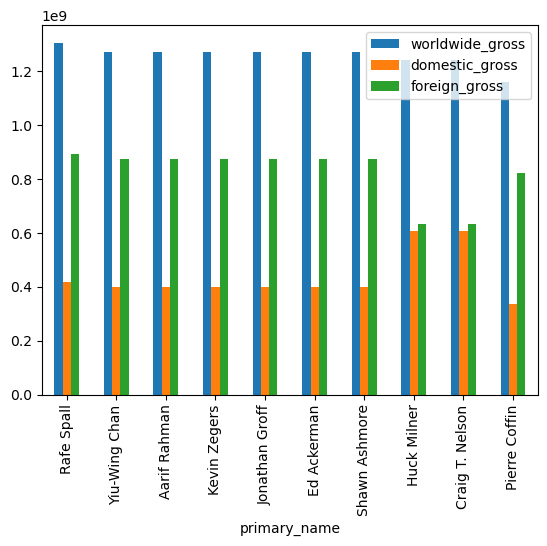

In [147]:
ar_analysis_worldwide.plot(kind="bar")

In [148]:
ar_analysis_domestic=ar_analysis_combined.groupby('primary_name',as_index=False).agg({'worldwide_gross':'mean','domestic_gross':'mean','foreign_gross':'mean'}).sort_values(by='domestic_gross', ascending=False,ignore_index=True)
ar_analysis_domestic.set_index('primary_name',inplace=True)
ar_analysis_domestic=ar_analysis_domestic.iloc[0:10,:]
ar_analysis_domestic

,worldwide_gross,domestic_gross,foreign_gross
primary_name,,,
Craig T. Nelson,1.242521e+09,608600000.0,634200000.0
Huck Milner,1.242521e+09,608600000.0,634200000.0
Diego Luna,1.049103e+09,532200000.0,523900000.0
Alan Tudyk,1.049103e+09,532200000.0,523900000.0
Donnie Yen,1.049103e+09,532200000.0,523900000.0
Ed O'Neill,1.021215e+09,486300000.0,542300000.0
Albert Brooks,1.021215e+09,486300000.0,542300000.0
Rafe Spall,1.305773e+09,417700000.0,891800000.0
Tim Allen,1.068880e+09,415000000.0,652000000.0


<Axes: xlabel='primary_name'>

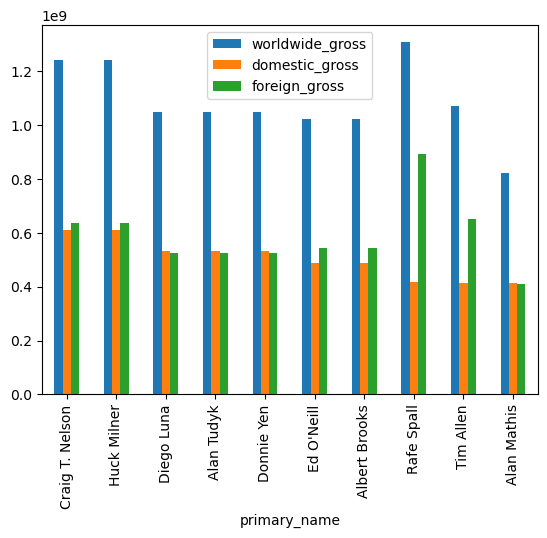

In [149]:
ar_analysis_domestic.plot(kind="bar")

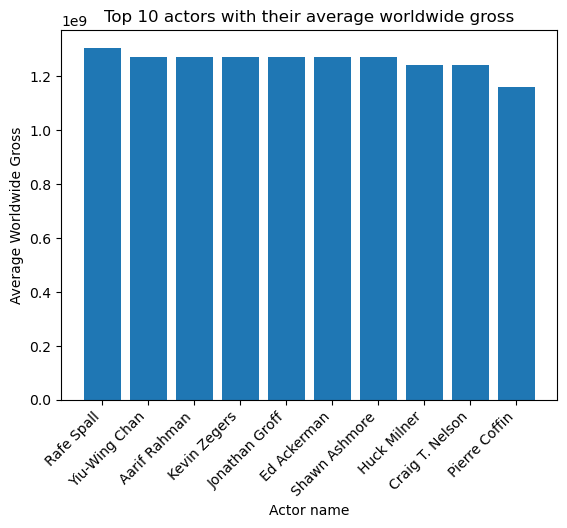

In [71]:
plt.bar(ar_analysis_combined.iloc[0:10,0], ar_analysis_combined.iloc[0:10,1])
plt.xlabel('Actor name')
plt.ylabel('Average Worldwide Gross')
plt.title('Top 10 actors with their average worldwide gross')
plt.xticks(rotation=45, ha="right")
plt.show()

In [486]:
a_rating=df9.groupby('primary_name',as_index=False)['averagerating'].mean().sort_values(by='averagerating', ascending=False,ignore_index=True)
a_rating.iloc[0:10,:]

,primary_name,averagerating
0,Mark Addy,9.2
1,Lee Boardman,9.2
2,Alen Stojs Goljar,9.1
3,Jure Janet,9.1
4,Nejc Hocevar,9.1
5,Seok-jin Kim,8.8
6,J-Hope,8.8
7,Nam-joon Kim,8.8
8,Suga,8.8
9,Andres Pollard,8.8


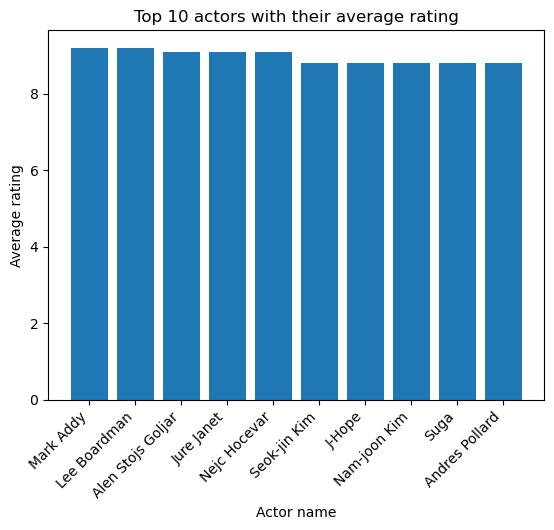

In [515]:
plt.bar(a_rating.iloc[0:10,0], a_rating.iloc[0:10,1])
plt.xlabel('Actor name')
plt.ylabel('Average rating')
plt.title('Top 10 actors with their average rating')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
plt.xlabel('Actor name')
plt.ylabel('Average rating')
plt.title('Top 10 actors with their average rating')


In [ ]:
Top 10 actors by Revenue/Gross(Bar Chart)
You should not remove studios, so that you can generate an insight which is top 10 studios by Rating or Revenue
Top 10 genres by Revenue - you can use explode function
Top 10 Studios by Ratings

df1['title']

In [78]:
df1.loc[:15, 'domestic_gross'].map(int)

1     334200000
2     296000000
3     292600000
4     238700000
5     300500000
6     312400000
7     200800000
8     251500000
9     217600000
10    163200000
11    104400000
12    135500000
13    172100000
14    176600000
15     90800000
Name: domestic_gross, dtype: int64

In [93]:
df1.describe()

,domestic_gross,year
count,3.358000e+03,3386.000000
mean,2.863082e+07,2013.959244
std,6.665985e+07,2.477573
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.787500e+07,2016.000000
max,9.367000e+08,2018.000000


In [94]:
df2.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [96]:
df2.dtypes

nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

In [97]:
df1.drop(3)

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [99]:
df1.index

RangeIndex(start=1, stop=3387, step=1)

In [100]:
df1.describe

<bound method NDFrame.describe of                                             title      studio  domestic_gross  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
5                      The Twilight Saga: Eclipse        Sum.     300500000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700

In [103]:
df1.columns.str.strip()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [106]:
df2.columns.map(lambda col: col.strip())

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [108]:
df2.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [115]:
df2.tail()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606647 entries, nm0061865 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606647 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555307 non-null  object 
 4   known_for_titles    576443 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [124]:
df1.describe()

,domestic_gross,year
count,3.358000e+03,3386.000000
mean,2.863082e+07,2013.959244
std,6.665985e+07,2.477573
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.787500e+07,2016.000000
max,9.367000e+08,2018.000000


df1.[domestic_gross].value counts()

In [131]:
df.info

<bound method DataFrame.info of                   primary_name  birth_year  death_year  \
nconst                                                   
nm0061865         Joseph Bauer         NaN         NaN   
nm0062070           Bruce Baum         NaN         NaN   
nm0062195         Axel Baumann         NaN         NaN   
nm0062798          Pete Baxter         NaN         NaN   
nm0062879       Ruel S. Bayani         NaN         NaN   
...                        ...         ...         ...   
nm9990381         Susan Grobes         NaN         NaN   
nm9990690          Joo Yeon So         NaN         NaN   
nm9991320       Madeline Smith         NaN         NaN   
nm9991786  Michelle Modigliani         NaN         NaN   
nm9993380       Pegasus Envoyé         NaN         NaN   

                                         primary_profession  \
nconst                                                        
nm0061865        composer,music_department,sound_department   
nm0062070               

In [134]:
df.describe()

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


In [136]:
df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"


In [137]:
data = pd.DataFrame

In [139]:
df.head()

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"


In [145]:
df1.groupby('domestic_gross')['year'].mean().head(10)

domestic_gross
100.0     2013.000000
300.0     2015.666667
400.0     2014.500000
500.0     2017.000000
600.0     2012.000000
700.0     2014.500000
800.0     2013.714286
900.0     2014.000000
1000.0    2013.000000
1100.0    2013.000000
Name: year, dtype: float64

In [147]:
df1.groupby('foreign_gross')['year'].mean().tail(10)

foreign_gross
97700000    2011.000000
97800000    2014.000000
97900000    2017.000000
9800000     2010.000000
98300000    2018.000000
98500000    2016.500000
988000      2015.000000
9900000     2014.428571
99600       2010.000000
99700       2013.500000
Name: year, dtype: float64

In [159]:
df1.duplicated().value_counts()

False    606408
Name: count, dtype: int64

In [155]:
df1[df1.duplicated(keep=False)].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year


In [162]:
df1 = df.drop_duplicates()

In [161]:
df1.duplicated().value_counts()

False    606408
Name: count, dtype: int64

In [163]:
tit=pd.read_csv('zippedData/imdb.title.akas.csv.gz')

In [164]:
tit.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
